In [93]:
with open('/media/daphne/Seagate Expansion Drive/DataBackup13Juni/ProbabilityTestResults/Results22songs.txt', 'r') as read_file:
    results = read_file.readlines()

In [94]:
import numpy as np

p_f = []
p_b = []
log_likelihood = []
csr_majmin = []

ll_table = np.zeros((21, 21))
mm_table = np.zeros((21, 21))

for result in results:
    parts = result.rstrip().split(';')
    p_f.append(float(parts[2]))
    p_b.append(float(parts[3]))
    log_likelihood.append(float(parts[4]))
    csr_majmin.append(float(parts[6]))
    ll_table[int(float(parts[2]) * 20), int(float(parts[3]) * 20)] += float(parts[4])
    mm_table[int(float(parts[2]) * 20), int(float(parts[3]) * 20)] += float(parts[6])

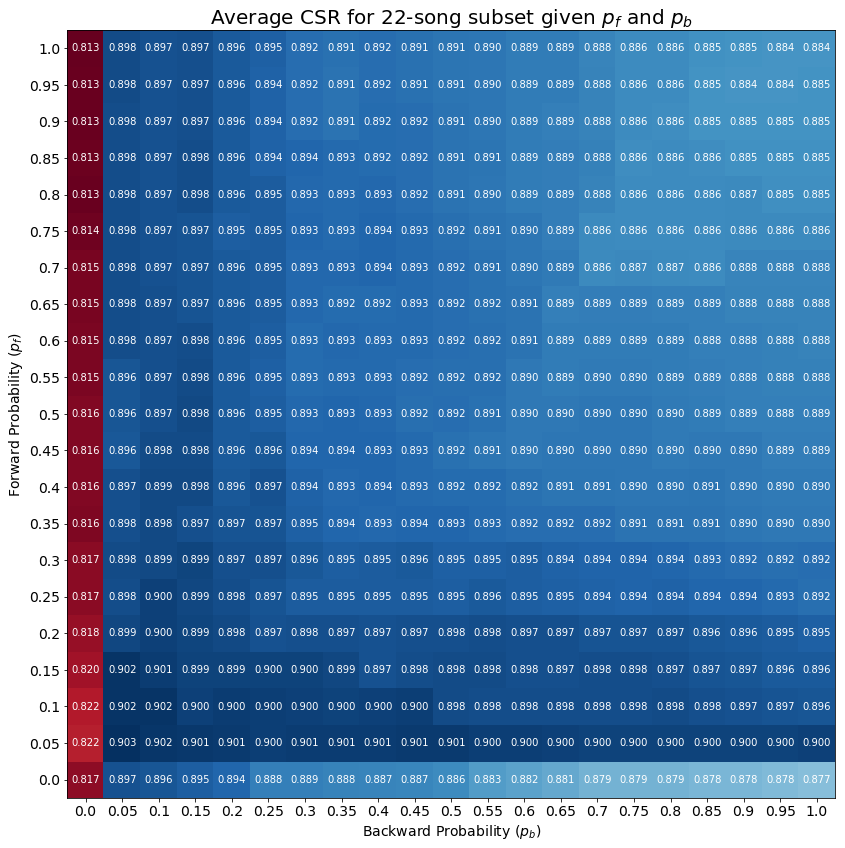

In [110]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(mm_table, origin='lower', cmap='RdBu')

# # We want to show all ticks...
ax.set_xticks(range(21))
ax.set_yticks(range(21))
# # ... and label them with the respective list entries
ax.set_xticklabels([x / 20.0 for x in range(21)])
ax.set_yticklabels([x / 20.0 for x in range(21)])

ax.set_xlabel('Backward Probability ($p_b$)')
ax.set_ylabel('Forward Probability ($p_f$)')

# Loop over data dimensions and create text annotations.
for i in range(21):
    for j in range(21):
        text = ax.text(j, i, '%.3f' % (mm_table[i, j] / 22),
                       ha="center", va="center", color="w", fontsize=10)

ax.set_title("Average CSR for 22-song subset given $p_f$ and $p_b$", fontsize=20)
fig.tight_layout()
plt.savefig('/media/daphne/Seagate Expansion Drive/Data/Results/Figures/ForwardBackwardHeatMap.png')

In [155]:
with open('/media/daphne/Seagate Expansion Drive/Data/Results/Tables/TabLabsResults.csv', 'r') as read_file:
    content = read_file.readlines()
    
all_tabs = dict()
durations = []
    
for line in content:
    key, duration, path, transposition, likelihood, csr, ovseg, unseg, seg = line.rstrip().split(';')[:9]
    key = int(key)
    duration = float(duration)
    likelihood = float(likelihood)
    csr = float(csr)
    ovseg = float(ovseg)
    unseg = float(unseg)
    seg = float(seg)
    ll.append(likelihood)
    cs.append(csr)
    if not key in all_tabs:
        all_tabs[key] = []
        durations.append(duration)
    all_tabs[key].append((likelihood, csr, ovseg, unseg, seg))

best_avg_c = []
best_ll_c = []
best_csr_c = []
best_avg_o = []
best_ll_o = []
best_csr_o = []
best_avg_u = []
best_ll_u = []
best_csr_u = []
best_avg_s = []
best_ll_s = []
best_csr_s = []

for song in all_tabs:
    tabs = all_tabs[song]
    best_avg_c.append(np.mean([x[1] for x in tabs]))
    best_ll_c.append(tabs[np.argmax([x[0] for x in tabs])][1])
    best_csr_c.append(tabs[np.argmax([x[1] for x in tabs])][1])
    best_avg_o.append(np.mean([x[2] for x in tabs]))
    best_ll_o.append(tabs[np.argmax([x[0] for x in tabs])][2])
    best_csr_o.append(tabs[np.argmax([x[1] for x in tabs])][2])
    best_avg_u.append(np.mean([x[3] for x in tabs]))
    best_ll_u.append(tabs[np.argmax([x[0] for x in tabs])][3])
    best_csr_u.append(tabs[np.argmax([x[1] for x in tabs])][3])
    best_avg_s.append(np.mean([x[4] for x in tabs]))
    best_ll_s.append(tabs[np.argmax([x[0] for x in tabs])][4])
    best_csr_s.append(tabs[np.argmax([x[1] for x in tabs])][4])
    
# print np.mean(best_avg), np.mean(best_ll), np.mean(best_csr)
print np.average(best_avg_c, weights=durations), np.average(best_ll_c, weights=durations), np.average(best_csr_c, weights=durations)
print np.average(best_avg_o, weights=durations), np.average(best_ll_o, weights=durations), np.average(best_csr_o, weights=durations)
print np.average(best_avg_u, weights=durations), np.average(best_ll_u, weights=durations), np.average(best_csr_u, weights=durations)
print np.average(best_avg_s, weights=durations), np.average(best_ll_s, weights=durations), np.average(best_csr_s, weights=durations)

0.7378813517269797 0.7703652371272218 0.7981648278752136
0.8837900860530881 0.8824304028152362 0.8909804079523697
0.7324880214763958 0.7604052337367507 0.7524504870748469
0.7202047058578932 0.746580008583732 0.7431550008301956


In [128]:
tabs
# np.argmax([x[0] for x in tabs])

[(3122.002214370554, 0.8921645805909786),
 (1550.1650077432123, 0.3215896245450791),
 (2703.7208104487618, 0.803229443478222),
 (3147.0041521121343, 0.9026329364063403),
 (2468.0402424179815, 0.6340771597401921)]